# Casamentos Homoafetivos do Brasil
Inicialmente será feito uma análise dos dados, com o <b>objetivo de encontrar insights</b> que nos fornecerão informações importantes <b>sobre gênero, estado e ano dos casamentos homoafetivos do Brasil.</b>

Após isso, será construído um <b>modelo de aprendizado de máquina</b> para realizar a <b>previsão</b> de casamentos homoafetivos para os próximos 2 anos nos 3 estados com maior número de casamentos no último ano.

### Importando as bibliotecas

In [955]:
# Manipulação dos dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelo de Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Separar dados de treinamento e dados de teste, e Hiperparametização
from sklearn.model_selection import train_test_split, GridSearchCV

# Deixar os dados na mesma escala para entrada no modelo
from sklearn.preprocessing import StandardScaler

# Métricas para identificar o desempenho do modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# 1. Juntando as tabelas

Como as tabelas dos anos e gênero estão separadas, decidi juntar todas as tabelas em um dataframe único para realizar os tratamentos e análise dos dados

## 1.1 Dataframe masculino

Nessa etapa, junto todas as tabelas do sexo masculino

In [2]:
df_masc_2015 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2015.csv')
df_masc_2016 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2016.csv')
df_masc_2017 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2017.csv')
df_masc_2018 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2018.csv')
df_masc_2019 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xlsx_2019.csv')
df_masc_2020 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2020.csv')
df_masc_2021 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2021.csv')

In [3]:
df_masc = pd.concat([df_masc_2015, 
                     df_masc_2016, 
                     df_masc_2017, 
                     df_masc_2018, 
                     df_masc_2019, 
                     df_masc_2020, 
                     df_masc_2021], ignore_index=True)

## 1.2 Dataframe feminino

Nessa etapa, junto todas as tabelas do sexo feminino

In [3]:
df_fem_2015 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2015.csv')
df_fem_2016 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2016.csv')
df_fem_2017 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2017.csv')
df_fem_2018 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2018.csv')
df_fem_2019 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xlsx_2019.csv')
df_fem_2020 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2020.csv')
df_fem_2021 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2021.csv')

In [6]:
df_fem = pd.concat([df_fem_2015, 
                     df_fem_2016, 
                     df_fem_2017, 
                     df_fem_2018, 
                     df_fem_2019, 
                     df_fem_2020, 
                     df_fem_2021], ignore_index=True)

## 1.3 Dataframe Final

As etapas anteriores resultaram em 2 dataframes um referente ao sexo masculino e outro referente ao feminino. Agora, vou juntar esses dataframes em um único dataframe, ordenados por ano de forma crescente

In [7]:
df = (pd.concat([df_masc, df_fem], ignore_index=True)).sort_values(by='ano')
df = df.reset_index(drop=True)

In [8]:
df

,ano,uf,genero,mes,numero
0,2015,Acre,Masculino,Abril,0
1,2015,Acre,Masculino,Março,0
2,2015,Acre,Masculino,Fevereiro,0
3,2015,Acre,Masculino,Janeiro,0
4,2015,Rondônia,Masculino,Dezembro,1
...,...,...,...,...,...
4531,2021,Rondônia,Masculino,Maio,3
4532,2021,Rondônia,Masculino,Abril,1
4533,2021,Rondônia,Masculino,Março,1
4534,2021,Rondônia,Masculino,Fevereiro,0


Salva o dataframe em formato .csv para ser utilizado nas próximas etapas

In [9]:
df.to_csv('data_concat.csv', index=False)

#  2. Limpeza e Organização dos Dados

In [4]:
df = pd.read_csv('data_concat.csv')

## 2.1 Informações sobre o Banco de Dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     4536 non-null   int64 
 1   uf      4536 non-null   object
 2   genero  4536 non-null   object
 3   mes     4536 non-null   object
 4   numero  4536 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 177.3+ KB


## 2.2 Identificação de Dados Duplicados

In [22]:
df.loc[df.duplicated()]

,ano,uf,genero,mes,numero,Região


Não há dados duplicado, então não foi preciso realizar nenhuma ação

## 2.3 Identificação de Dados Nulos

In [14]:
df.isnull().sum()

ano       0
uf        0
genero    0
mes       0
numero    0
dtype: int64

Como não há dados invalidos, nenhuma ação foi realizada

## 2.4 Adicionando Região ao dataframe

Nessa etapa, foi adicionado a coluna de região ao dataframe para uma análise mais aprofundada, onde pode-se tirar insights importantes

In [15]:
uf_region = {
    'Acre': 'Norte',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Pará': 'Norte',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Tocantins': 'Norte',
    'Alagoas': 'Nordeste',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Maranhão': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Sergipe': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Minas Gerais': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'São Paulo': 'Sudeste',
    'Paraná': 'Sul',
    'Rio Grande do Sul': 'Sul',
    'Santa Catarina': 'Sul'
}

df['Região'] = df['uf'].map(uf_region)

In [16]:
df

,ano,uf,genero,mes,numero,Região
0,2015,Acre,Masculino,Abril,0,Norte
1,2015,Acre,Masculino,Março,0,Norte
2,2015,Acre,Masculino,Fevereiro,0,Norte
3,2015,Acre,Masculino,Janeiro,0,Norte
4,2015,Rondônia,Masculino,Dezembro,1,Norte
...,...,...,...,...,...,...
4531,2021,Rondônia,Masculino,Maio,3,Norte
4532,2021,Rondônia,Masculino,Abril,1,Norte
4533,2021,Rondônia,Masculino,Março,1,Norte
4534,2021,Rondônia,Masculino,Fevereiro,0,Norte


In [25]:
df.nunique()

ano         7
uf         27
genero      2
mes        12
numero    152
Região      5
dtype: int64

Todos os valores <b>fazem sentido</b>, podemos seguir para salvar o dataframe final para começar as análises

In [17]:
df.to_csv('data_final.csv', index=False)

# 3. Análise dos Dados

In [967]:
df = pd.read_csv('data_final.csv')
df

,ano,uf,genero,mes,numero,Região
0,2015,Acre,Masculino,Abril,0,Norte
1,2015,Acre,Masculino,Março,0,Norte
2,2015,Acre,Masculino,Fevereiro,0,Norte
3,2015,Acre,Masculino,Janeiro,0,Norte
4,2015,Rondônia,Masculino,Dezembro,1,Norte
...,...,...,...,...,...,...
4531,2021,Rondônia,Masculino,Maio,3,Norte
4532,2021,Rondônia,Masculino,Abril,1,Norte
4533,2021,Rondônia,Masculino,Março,1,Norte
4534,2021,Rondônia,Masculino,Fevereiro,0,Norte


### 3.1 Medidas estatísticas

In [8]:
df['numero'].describe() 
#Só foi escolhido a coluna "número", pois é a única que faz sentido para essas análises

count    4536.000000
mean       11.257937
std        27.886390
min         0.000000
25%         1.000000
50%         4.000000
75%        11.000000
max       827.000000
Name: numero, dtype: float64

Alguns Insights:
1. A média de casamentos de 2015 a 2021, considerando todos os gêneros é aproximadamente 11. 

2. Observando o valor máximo, podemos identificar um valor (827 casamento no estado) que difere significativamente dos outros valores, portanto será necessário verificar os outliers.

3. É possível verificar um desvio-padrão relativamente grande, tendo uma alta dispersão. Mostrando que uma análise aprodundada de 2015-2021 não seja tão interessante, sendo melhor verificar um ano específico.

### 3.2 Verificando Outliers

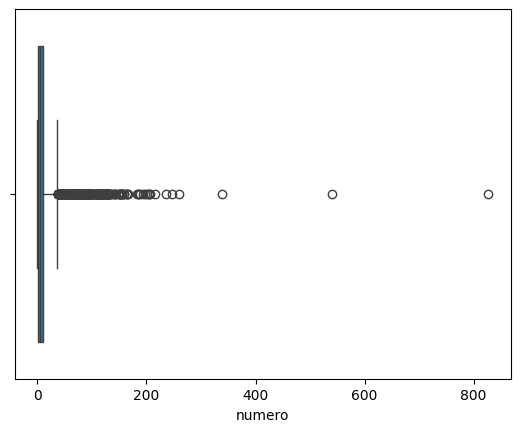

In [20]:
sns.boxplot(x=df['numero'])
plt.show()

C:\Users\jeisi\AppData\Local\Temp\ipykernel_17176\4253759900.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['ano'], y=df['numero'], palette='rainbow')


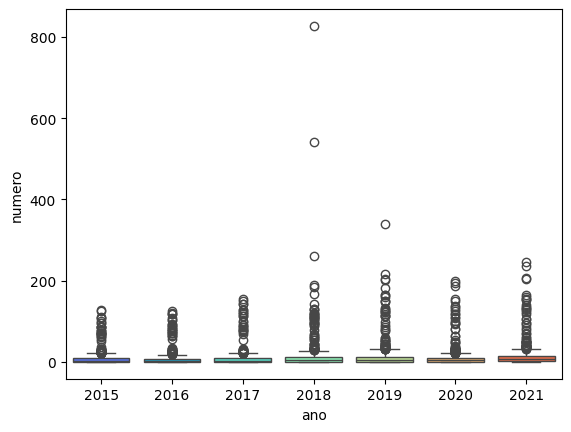

In [19]:
sns.boxplot(x=df['ano'], y=df['numero'], palette='rainbow')
plt.show()

In [34]:
df['numero'].unique()

array([  0,   1,   3,  11,   2,  15,   5,   4,  10,   6,   8,  16,  25,
        17,  21,  26,  29,  18,   7,  13,  31,  14,  12,  20,  23,  78,
        86,  85,  76,  72,  69,  62,  64,  68,  57,  52,  32,   9,  27,
        22,  24,  36,  28,  30,  96, 100, 107, 128, 111, 126, 109,  95,
        87,  19,  81,  80, 102,  70,  75,  65,  66,  71,  92,  79,  34,
       125, 117, 118, 120, 108,  93, 143, 151, 154, 119, 121, 123, 113,
        91,  98,  77,  73,  53,  43,  42, 131, 130, 184, 189, 260, 827,
        33,  35,  37, 129, 105, 115,  60,  39, 167, 541, 101,  94,  89,
        55, 132,  99, 112, 122,  90, 201,  48,  44,  59,  40, 165, 205,
       164, 147, 150, 159, 183, 216, 339,  45,  82,  38,  47, 155, 149,
       198, 186, 194, 137,  63,  97,  49, 134, 141,  84,  41,  61,  46,
        50, 207, 246, 236, 204, 156, 135, 124, 153])

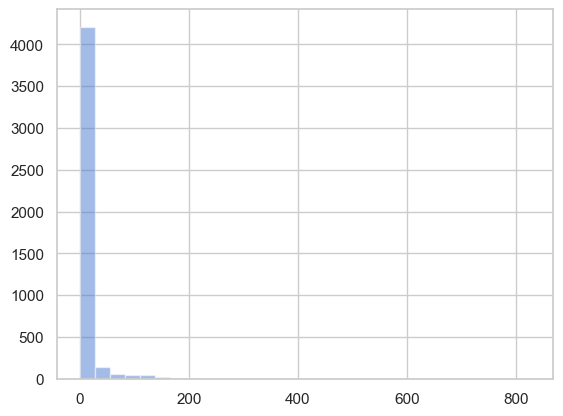

In [156]:
plt.hist(df['numero'], bins=30, alpha=0.5)
plt.show()

Alguns Insights:

1. Os bloxplot apontaram uma grande quantidade de outliers entre 20 a 180 casamentos para todo o dataframe, porém podem indicar que não são valores atípicos e sim uma alta dispersão. Além disso, por está analisando todo o dataframe, esses outliers (20 a 180) indicam que os dados são heterogêneos.

### 3.3 Análise Anual

In [968]:
df_year = df.groupby(['ano'])['numero'].agg(['sum', 'mean']).reset_index()
df_year['variacao%'] = df_year['sum'].pct_change()*100
df_year

,ano,sum,mean,variacao%
0,2015,5614,8.663580,NaN
1,2016,5354,8.262346,-4.631279
2,2017,5887,9.084877,9.955174
3,2018,9520,14.691358,61.712247
4,2019,9056,13.975309,-4.873950
5,2020,6433,9.927469,-28.964223
6,2021,9202,14.200617,43.043681


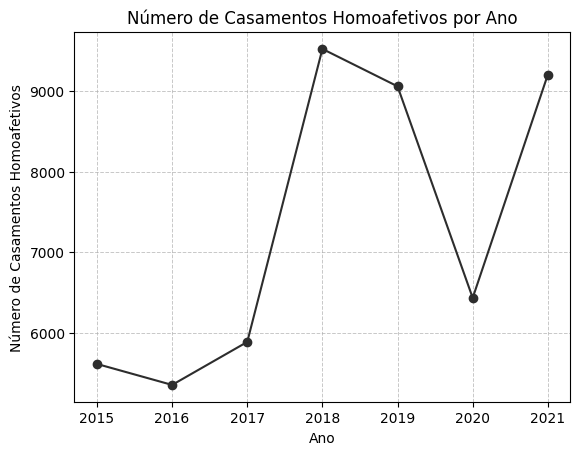

In [980]:
plt.plot(df_year['ano'], df_year['sum'], marker='o', color='#2d2d2d')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Número de Casamentos Homoafetivos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.savefig("grafico-por-ano.png", dpi=300, transparent='True')
plt.show()

Alguns Insights:
1. É possível perceber um grande aumento nos casamentos homoafetivos em 2018.

2. 2018 e 2019 mantiveram próximo com uma variação de -4,87%

3. 2020 houve uma queda brusca de aproximadamente -29%, possivelmente devido a pandemia da covid-19.

4. Em 2021 a quantidade de casamentos voltaram a subir, ultrapassando 2019

5. A média de 2018, 2019 e 2021 superaram a média de casamento no período de 2015 a 2021

#### 3.3.1 Análise Anual Por Gênero

In [977]:
df_year_gen = df.groupby(['genero', 'ano'])['numero'].agg(['sum', 'mean']).reset_index()
df_year_gen = df_year_gen.pivot_table(values=(['sum', 'mean']), index='ano', columns='genero', aggfunc='sum').reset_index()
df_year_gen.columns.names = [None, None]
df_year_gen.loc[:, ('sum', 'diferenca')] = df_year_gen['sum']['Feminino'] - df_year_gen['sum']['Masculino']
df_year_gen.loc[:, ('sum', 'Total')] = df_year_gen['sum']['Feminino'] + df_year_gen['sum']['Masculino']

df_year_gen

ano       mean                 sum                          
          Feminino  Masculino Feminino Masculino diferenca Total
0  2015   9.216049   8.111111     2986      2628       358  5614
1  2016   9.083333   7.441358     2943      2411       532  5354
2  2017  10.453704   7.716049     3387      2500       887  5887
3  2018  17.166667  12.216049     5562      3958      1604  9520
4  2019  16.509259  11.441358     5349      3707      1642  9056
5  2020  11.925926   7.929012     3864      2569      1295  6433
6  2021  17.290123  11.111111     5602      3600      2002  9202

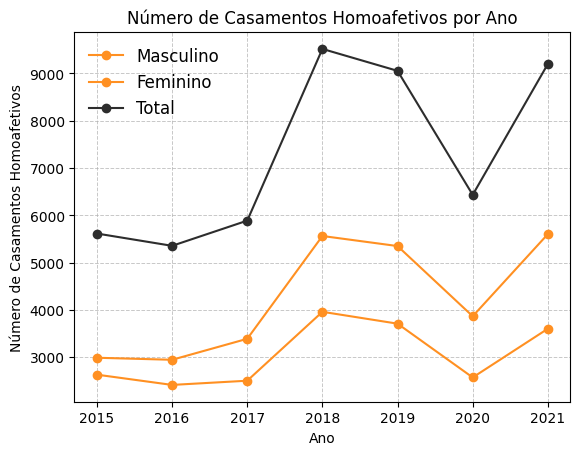

In [990]:
plt.plot(df_year_gen['ano'], df_year_gen['sum']['Masculino'], marker='o', label='Masculino', color="#ff9022")
plt.plot(df_year_gen['ano'], df_year_gen['sum']['Feminino'], marker='o', label='Feminino', color="#ff9022")
plt.plot(df_year_gen['ano'], df_year_gen['sum']['Total'], marker='o', label='Total', color='#2d2d2d')
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.title('Número de Casamentos Homoafetivos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.savefig("./img/grafico-fem-masc-por-ano.png", dpi=300, transparent='True')
plt.show()

Alguns Insights:

1. A quantidade de casamentos Homoafetivos do sexo feminino é maior do que a quantidade de casamentos homoafeitovs do sexo masculino desde de 2015.

2. 2021 foi o ano que obteve a maior diferença, sendo de 2002

### 3.4 Análise por Gênero

In [987]:
df_gen = df.groupby(['genero'])['numero'].agg(['sum', 'mean']).reset_index()
df_gen['%'] = (df_gen['sum'] / df_gen['sum'].sum()) * 100
df_gen

,genero,sum,mean,%
0,Feminino,29693,13.092152,58.14632
1,Masculino,21373,9.423721,41.85368


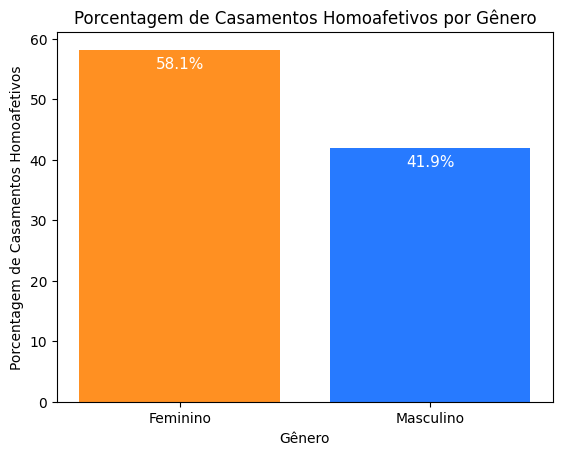

In [991]:
fig, ax = plt.subplots()

bars = ax.bar(df_gen['genero'], df_gen['%'], color=['#ff9022', '#277aff'])


for bar in bars:
    height = bar.get_height() 
    ax.annotate('{:.1f}%'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),
                textcoords="offset points",
                ha='center',
                va='center',
                fontsize=11,
                color='white')

ax.set_title('Porcentagem de Casamentos Homoafetivos por Gênero')
ax.set_xlabel('Gênero')
ax.set_ylabel('Porcentagem de Casamentos Homoafetivos')
plt.savefig("./img/grafico-fem-masc.png", dpi=300, transparent='True')
plt.show()

Alguns Insights:

1. A quantidade de casamentos Homoafetivos do sexo feminino representa 58,1% enquando a masculina é de 41,9% desde de 2015.

### 3.5 Análise Regional

In [992]:
df_region = df.groupby(['Região'])['numero'].agg(['sum', 'mean']).reset_index()
df_region.sort_values(by='sum', ascending=False)

,Região,sum,mean
3,Sudeste,29714,44.217262
1,Nordeste,8070,5.337302
4,Sul,7192,14.269841
0,Centro-Oeste,4192,6.238095
2,Norte,1898,1.613946


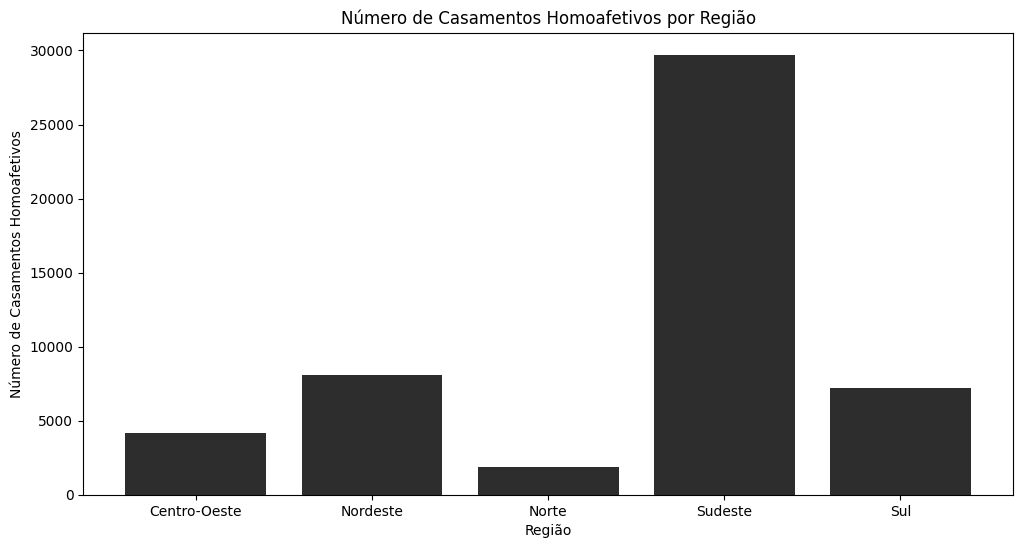

In [995]:
plt.figure(figsize=(12,6))
plt.bar(df_region['Região'], df_region['sum'], color='#2d2d2d')
plt.title('Número de Casamentos Homoafetivos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Casamentos Homoafetivos')

plt.savefig("./img/grafico-regiao.png", dpi=300, transparent='True')


plt.show()

Alguns Insights:

1. As regiões com maiores números de casamento homoafetivos são: Sudeste, Nordeste e Sul.

2. Já as regiões com as maiores <b>médias</b> são: Sudeste, Sul e Centro-Oeste. 

Isso pode significar que na região Sul e Centro-Oeste obtiveram mais casamentos em seus estados, mas no total é inferior ao Nordeste

#### 3.5.1 Análise Regional por Genêro

In [996]:
df_region_gen = df.groupby(['Região', 'genero'])['numero'].sum().unstack()
df_region_gen.columns.name = None
df_region_gen['Total'] = df_region_gen['Feminino'] + df_region_gen['Masculino']
df_region_gen.sort_values(by='Total', ascending=False)

,Feminino,Masculino,Total
Região,,,
Sudeste,17482,12232,29714
Nordeste,4981,3089,8070
Sul,3826,3366,7192
Centro-Oeste,2250,1942,4192
Norte,1154,744,1898


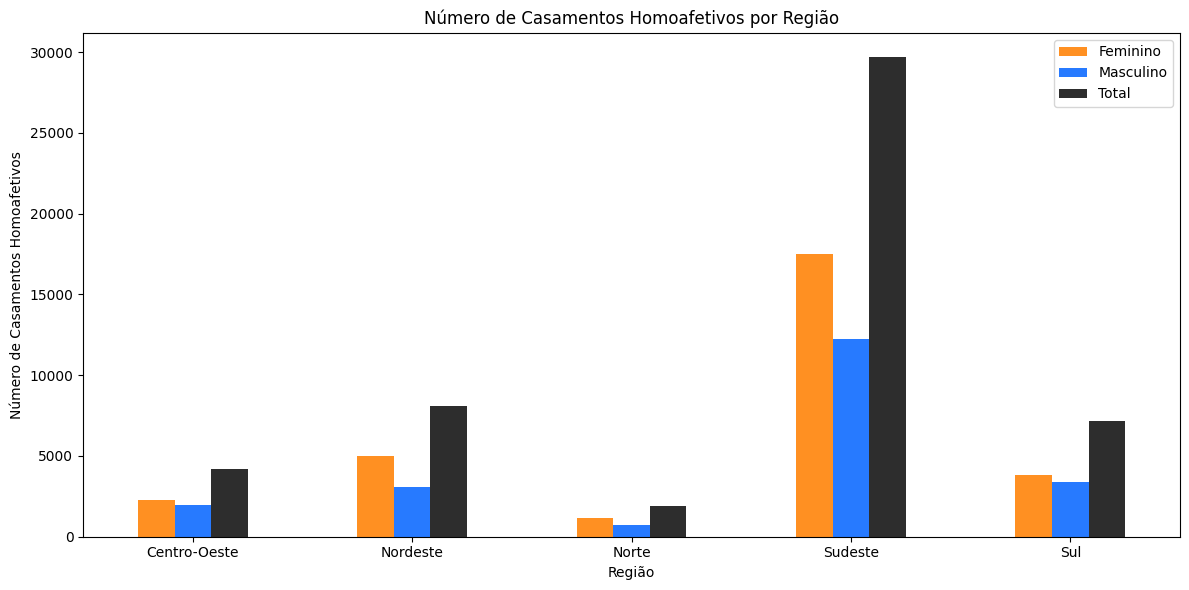

In [998]:
ax = df_region_gen.plot(kind='bar', figsize=(12,6), color=['#ff9022', '#277aff', '#2d2d2d'])
plt.title('Número de Casamentos Homoafetivos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.xticks(rotation=360)
plt.tight_layout()
plt.savefig("./img/grafico-regiao-gen.png", dpi=300, transparent='True')
plt.show()

Alguns Insights:

1. A Quantidade de Casamentos Homoafetivos Feminino são maiores em todas a região do que o masculino

### 3.6 Analise Estado Total

In [999]:
df_uf = df.groupby(['uf'])['numero'].agg(['sum', 'mean']).reset_index()
df_uf = df_uf.sort_values(by='sum', ascending=False)
df_uf

,uf,sum,mean
25,São Paulo,20285,120.744048
20,Rio de Janeiro,4584,27.285714
12,Minas Gerais,4087,24.327381
23,Santa Catarina,2544,15.142857
13,Paraná,2500,14.880952
5,Ceará,2166,12.892857
19,Rio Grande do Sul,2148,12.785714
16,Pernambuco,1855,11.041667
4,Bahia,1531,9.113095
6,Distrito Federal,1378,8.202381


#### 3.5.1 Análise Estado por Ano

In [88]:
df_uf_year = df.groupby(['uf', 'ano'])['numero'].agg(['sum', 'mean']).reset_index()
df_uf_year = df_uf_year.sort_values(by='sum', ascending=False)
df_uf_year

,uf,ano,sum,mean
178,São Paulo,2018,4100,170.833333
179,São Paulo,2019,3573,148.875000
181,São Paulo,2021,3319,138.291667
180,São Paulo,2020,2694,112.250000
177,São Paulo,2017,2497,104.041667
...,...,...,...,...
0,Acre,2015,6,0.250000
14,Amapá,2015,6,0.250000
1,Acre,2016,5,0.208333
157,Roraima,2018,5,0.208333


In [90]:
df_uf_2021 = df_uf_year[df_uf_year['ano'] == 2021].sort_values(by='sum', ascending=False)
df_uf_2021

,uf,ano,sum,mean
181,São Paulo,2021,3319,138.291667
90,Minas Gerais,2021,815,33.958333
146,Rio de Janeiro,2021,734,30.583333
97,Paraná,2021,486,20.250000
167,Santa Catarina,2021,404,16.833333
76,Mato Grosso,2021,376,15.666667
41,Ceará,2021,372,15.500000
118,Pernambuco,2021,359,14.958333
139,Rio Grande do Sul,2021,344,14.333333
34,Bahia,2021,303,12.625000


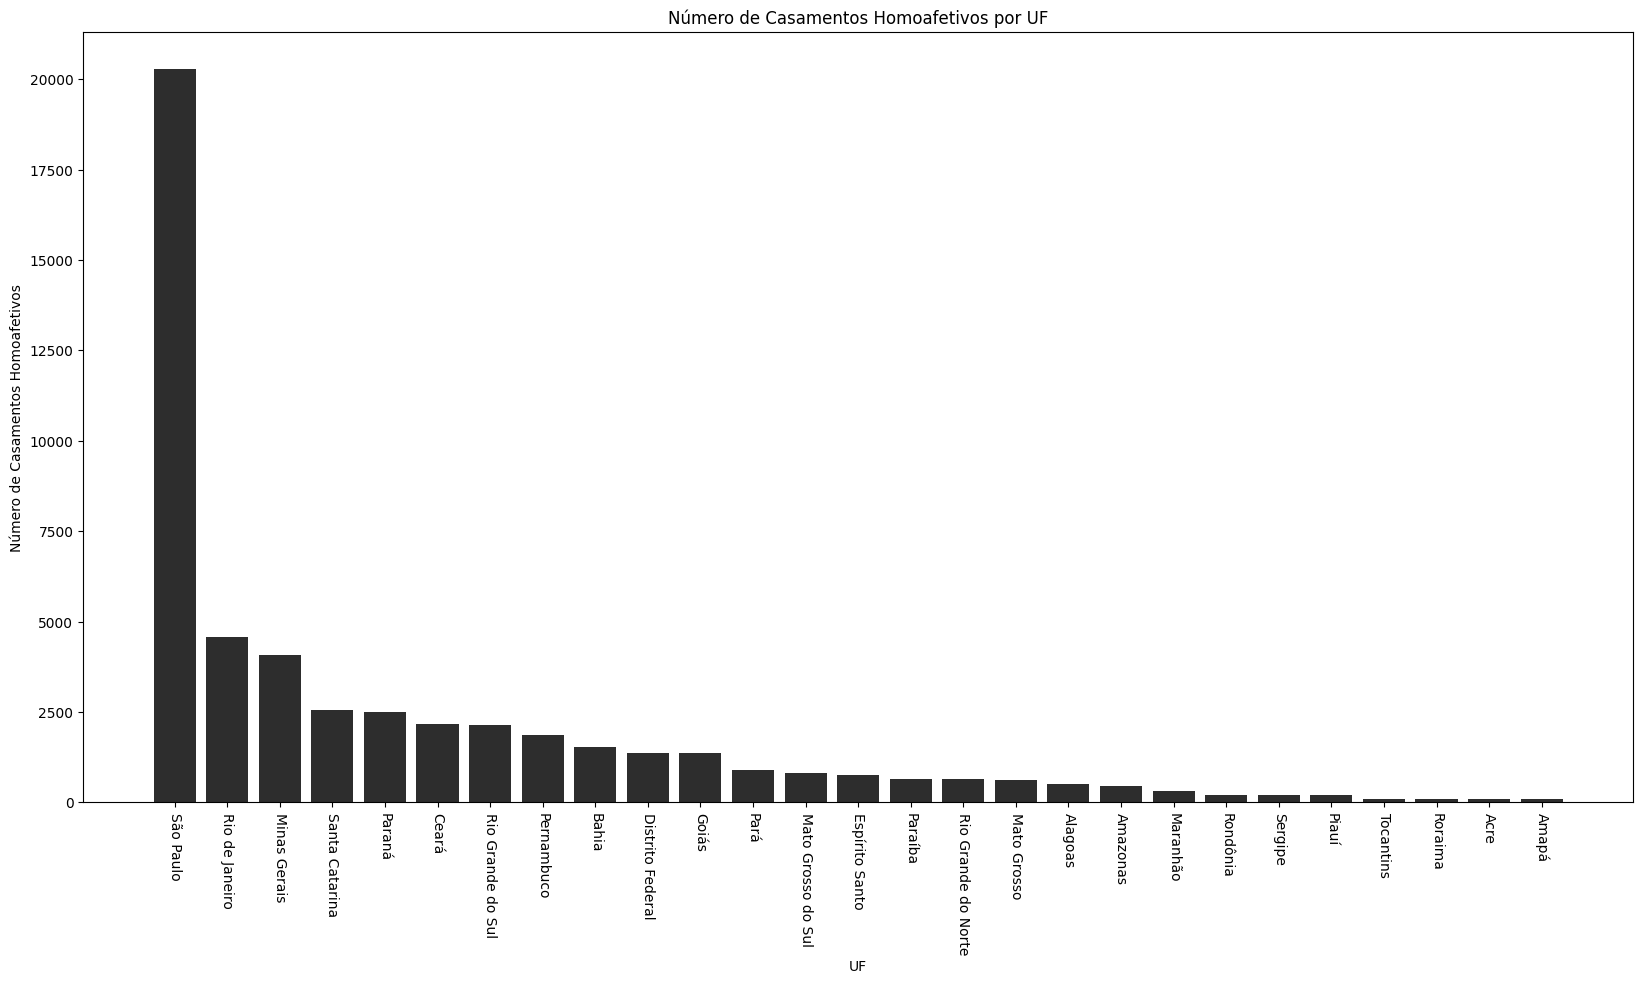

In [1007]:
plt.figure(figsize=(20,10))
plt.bar(df_uf['uf'], df_uf['sum'], color='#2d2d2d')
plt.title('Número de Casamentos Homoafetivos por UF')
plt.xlabel('UF')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.xticks(rotation=270)
plt.savefig("./img/grafico-estado.png", transparent='True')
plt.show()

#### Análise Estado por Gênero

In [1013]:
df_uf_gen = df.groupby(['uf', 'genero'])['numero'].sum().reset_index()
df_uf_gen = df_uf_gen.pivot_table(values='numero', index='uf', columns='genero', aggfunc='sum')
df_uf_gen.columns.name = None
df_uf_gen['diferenca'] = df_uf_gen['Feminino'] - df_uf_gen['Masculino']
df_uf_gen['Total'] = df_uf_gen['Feminino'] + df_uf_gen['Masculino']
df_uf_gen=df_uf_gen.sort_values(by='Total', ascending=False)
df_uf_gen

,Feminino,Masculino,diferenca,Total
uf,,,,
São Paulo,12083,8202,3881,20285
Rio de Janeiro,2667,1917,750,4584
Minas Gerais,2327,1760,567,4087
Santa Catarina,1175,1369,-194,2544
Paraná,1446,1054,392,2500
Ceará,1325,841,484,2166
Rio Grande do Sul,1205,943,262,2148
Pernambuco,1240,615,625,1855
Bahia,886,645,241,1531


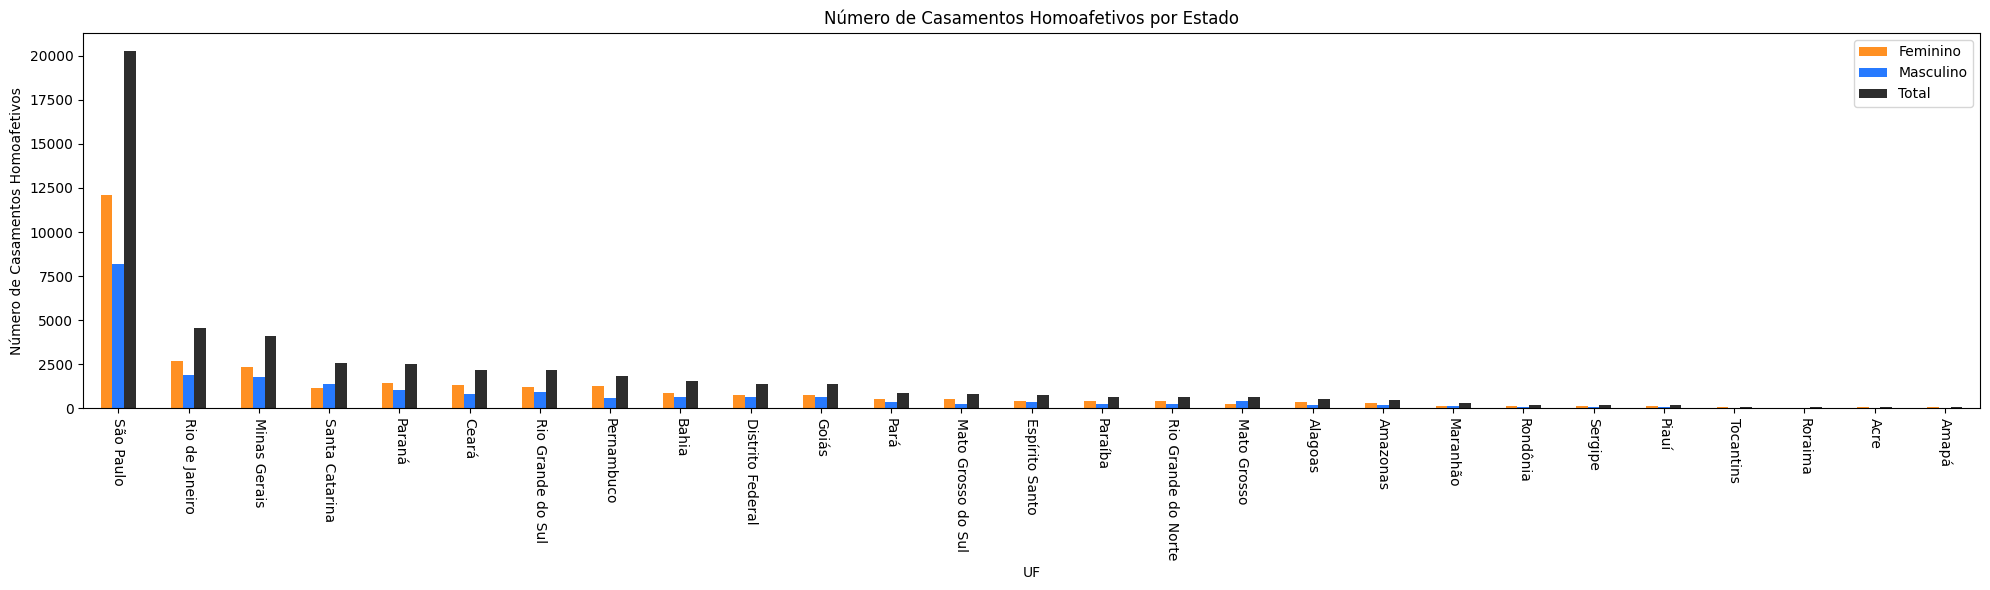

In [1017]:
ax = df_uf_gen[['Feminino', 'Masculino', 'Total']].plot(kind='bar', figsize=(20,6), color=['#ff9022', '#277aff', '#2d2d2d'])
plt.title('Número de Casamentos Homoafetivos por Estado')
plt.xlabel('UF')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.xticks(rotation=270)
plt.tight_layout()
plt.savefig("./img/grafico-estado-gen.png", dpi=300, transparent='True')
plt.show()

Alguns Insights:

1. Os <b>estados com maiores casamentos homoafetivos</b> são: <b>São Paulo, Rio de Janeiro e Minas Gerais</b>. 

2. A Quantidade de Casamentos Homoafetivos <b>Masculino são maiores que o feminino</b> nos estados: <b>Santa Catarina, Mato Grosso e Maranhão</b>.

### 3.7 Análise Por Mês

In [1018]:
df_mes = df.groupby(['mes'])['numero'].agg(['sum', 'mean']).reset_index()
df_mes = df_mes.sort_values(by='sum', ascending=False)
df_mes

,mes,sum,mean
2,Dezembro,7716,20.412698
9,Novembro,5062,13.391534
10,Outubro,4689,12.404762
11,Setembro,4528,11.978836
4,Janeiro,4252,11.248677
5,Julho,3806,10.068783
3,Fevereiro,3753,9.928571
8,Março,3727,9.859788
1,Agosto,3566,9.433862
6,Junho,3519,9.309524


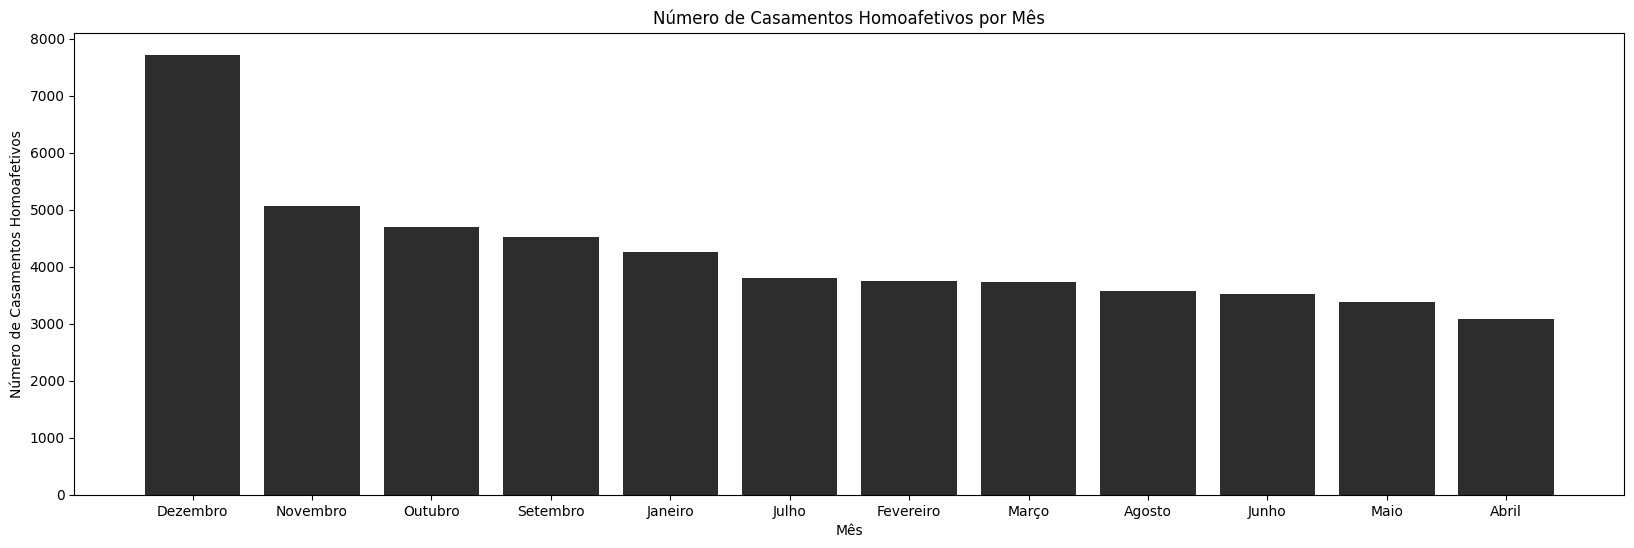

In [1019]:
plt.figure(figsize=(20,6))
plt.bar(df_mes['mes'], df_mes['sum'], color='#2d2d2d')
plt.title('Número de Casamentos Homoafetivos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.savefig("./img/grafico-mes.png", transparent='True')
plt.show()

Alguns Insights:

1. Os meses em que acontece a maior quantidade de casamentos homoafetivos são: Dezembro, Novembro e Outubro (os 3 últimos meses do ano)

---

### <b>3.8 Principais Insights</b>

- A média de casamentos entre 2015 e 2021, considerando todos os gêneros, foi de aproximadamente 11. Apesar de ser um número pequeno, o contexto social de aceitação ao longo do tempo possui grande influência para essa média.

- O boxplot apontou uma alta dispersão nos dados, com valores variando entre 20 e 180 casamentos. Isso sugere uma grande heterogeneidade nos dados, causada por diferenças regionais e populacionais. Porém, valores acima de 180 podem ser considerados atípicos, e deverão ser tratados para treinar um modelo de <i>machine learning</i>. Isso também pode ser observado no histograma.

- Em 2018, houve um aumento significativo no número de casamentos homoafetivos. Esse fato pode estar relacionado com o crescimento da aceitação pública, debates na mídia e eventos que trazem visibilidade para os direitos LGBTQIA+.

- No ano de 2020, houve uma queda acentuada de aproximadamente -29% no número de casamentos, provavelmente causada pela pandemia da COVID-19. As restrições sanitárias, distanciamento social e <i>lockdown</i> impactaram diretamente a realização das cerimônicas de casamento, fazendo com que muitos casais adiassem o evento, causando essa redução significativa.

- Em 2021, foi possível perceber uma recuperação nos números de casamentos, ultrapassando os valores de 2019. Uma possível causa para isso é a volta das cerimônias que haviam sido adiadas em 2020.

- Desde 2015, a quantidade de casamentos homoafetivos femininos se manteve maior do que a de casamentos masculinos, sendo 58,1% dos casamentos foram femininos, enquanto 41,9% foram masculinos, esse fato se repete para uma análise regional. Uma possível causa para isso é as mulheres estarem mais propensas a formalizar suas uniões. Em 2021, essa diferença foi de 2002 casamentos a mais entre mulheres, o maior valor entre 2015-2021.

- As regiões Sudeste, Nordeste e Sul lideram em números absolutos de casamentos homoafetivos. Porém, ao observar as médias, as regiões Sudeste, Sul e Centro-Oeste são as que se destacam. Embora o Nordeste tenha um número total alto, a distribuição de casamentos por estados no Sul e Centro-Oeste é mais homogênea, podendo indicar uma aceitação do contexto social ou politica nesses estados.

- Há apenas 3 estados onde os casamentos homoafetivos masculinos são mais frequentes: Santa Catarina, Mato Grosso e Maranhão. Esse dado pode ser reflexo de características culturais ou demográficas desses estados.

- Os <b>estados com os maiores números casamentos homoafetivos</b> são: <b>São Paulo, Rio de Janeiro e Minas Gerais</b>. Esses estados são mais populosos, economicamente desenvolvidos e possuem maior aceitação social dos direitos LGBTQIA+, influenciando positivamente os números.

- Já para o último ano, 2021, Os <b>estados com os maiores números casamentos homoafetivos</b> são: <b>São Paulo, Minas Gerais e Rio de Janeiro</b>.

- A maior parte dos casamentos homoafetivos ocorrem nos últimos 3 meses do ano, sendo Dezembro, Novembro e Outubro. Uma possível causa para isso é o clima mais favorável, recebimento de bônus ou 13° e férias de fim de ano.

---

# 4. Previsão de Casamentos Homoafetivos
Nessa etapa, será realizada a modelagem de um  *machine learning*, o principal objetivo é **construir um modelo** que possa **prever a quantidade de casamentos homoafetivos** para os próximos **2 anos** nos **3 estados com maior número de casamentos** no ano de **2021**. 

Como analisado na etapa anterior [etapa anterior](#analise-estado), os 3 estados com maior número de casamento  em 2021 são: 

**1° - São Paulo**

**2° - Minas Gerais**

**3° - Rio de Janeiro**

Será desenvolvido 3 modelos, um para cada estado, como foi solicitado a previsão total, não será realizado uma previsão por gênero.

Antes de realizar a modelagem, será necessário realizar um pré-processamento dos dados, pois temos muitos dados categóricos que não são compatíveis com os modelos de *machine learning*, além disso temos outliers como observado na [seção anterior](#32-verificando-outliers), pois interferem negativamente no desempenho dos modelos

### 4.1 Pré-processamento dos dados

In [473]:
df = pd.read_csv('data_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     4536 non-null   int64 
 1   uf      4536 non-null   object
 2   genero  4536 non-null   object
 3   mes     4536 non-null   object
 4   numero  4536 non-null   int64 
 5   Região  4536 non-null   object
dtypes: int64(2), object(4)
memory usage: 212.8+ KB


#### 4.1.1 Transformando os dados categóricos em numéricos

Como observado acima, temos 4 colunas de dados categóricos (representados pelo Dtype = object), sendo eles: os estados (uf), gênero, mês e região.

É possível realizar essas transformação de duas formas: manualmente através de dicionários e map ou automático com Label Encoding e One-Hot Encoding, será apresentado apenas a forma manual.

In [474]:
gen = {
    'Masculino': 0,
    'Feminino': 1
}

df['genero'] = df['genero'].map(gen)

mes = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

df['mes'] = df['mes'].map(mes)

uf_id = { #ID dos UFs de acordo com IBGE
    'Acre': 12,
    'Amapá': 16,
    'Amazonas': 13,
    'Pará': 15,
    'Rondônia': 11,
    'Roraima': 14,
    'Tocantins': 17,
    'Alagoas': 27,
    'Bahia': 29,
    'Ceará': 23,
    'Maranhão': 21,
    'Paraíba': 25,
    'Pernambuco': 26,
    'Piauí': 22,
    'Rio Grande do Norte': 24,
    'Sergipe': 28,
    'Distrito Federal': 53,
    'Goiás': 52,
    'Mato Grosso': 51,
    'Mato Grosso do Sul': 50,
    'Espírito Santo': 32,
    'Minas Gerais': 31,
    'Rio de Janeiro': 33,
    'São Paulo': 35,
    'Paraná': 41,
    'Rio Grande do Sul': 43,
    'Santa Catarina': 42
}

df['uf_id'] = df['uf'].map(uf_id)

A coluna "uf" será removida juntamente com a coluna região, por não fazer sentido para essa análise, pois os 3 estados são da região sudeste.

Não é mais necessário ter uma coluna para Ano e outra para o Mês, podemos juntar as duas informações e remover as duas colunas, porém irei mante-las para facilitar as análises futuras

A biblioteca Scikit-learn não aceita dados em formato datetime, portanto foi necessário transformar para int *"data_ordinal"*, para isso foi utilizado a função *toordinal()*, onde faz a contagem de dias corridos desde o dia 1 do ano 1 até a data analisada.

In [475]:
df['data'] = df['ano'].astype(str) + '/' + df['mes'].astype(str)
df['data'] = pd.to_datetime(df['data'], format='%Y/%m')
df['data_ordinal'] = df['data'].apply(lambda x: x.toordinal())
df = df.drop(['uf', 'Região'], axis=1)
df

,ano,genero,mes,numero,uf_id,data,data_ordinal
0,2015,0,4,0,12,2015-04-01,735689
1,2015,0,3,0,12,2015-03-01,735658
2,2015,0,2,0,12,2015-02-01,735630
3,2015,0,1,0,12,2015-01-01,735599
4,2015,0,12,1,11,2015-12-01,735933
...,...,...,...,...,...,...,...
4531,2021,0,5,3,11,2021-05-01,737911
4532,2021,0,4,1,11,2021-04-01,737881
4533,2021,0,3,1,11,2021-03-01,737850
4534,2021,0,2,0,11,2021-02-01,737822


Salvando o dataframe para uso posterior.

In [476]:
df.to_csv('data_ml.csv', index=False)

#### 4.1.2 Separando os dataframes por estado

In [1020]:
df = pd.read_csv('data_ml.csv')
df

,ano,genero,mes,numero,uf_id,data,data_ordinal
0,2015,0,4,0,12,2015-04-01,735689
1,2015,0,3,0,12,2015-03-01,735658
2,2015,0,2,0,12,2015-02-01,735630
3,2015,0,1,0,12,2015-01-01,735599
4,2015,0,12,1,11,2015-12-01,735933
...,...,...,...,...,...,...,...
4531,2021,0,5,3,11,2021-05-01,737911
4532,2021,0,4,1,11,2021-04-01,737881
4533,2021,0,3,1,11,2021-03-01,737850
4534,2021,0,2,0,11,2021-02-01,737822


In [1021]:
df_sp = df[(df['uf_id'] == 35)]
df_sp

,ano,genero,mes,numero,uf_id,data,data_ordinal
176,2015,0,12,78,35,2015-12-01,735933
177,2015,0,11,86,35,2015-11-01,735903
178,2015,0,10,85,35,2015-10-01,735872
179,2015,0,9,76,35,2015-09-01,735842
180,2015,0,8,72,35,2015-08-01,735811
...,...,...,...,...,...,...,...
4451,2021,1,5,135,35,2021-05-01,737911
4452,2021,1,4,128,35,2021-04-01,737881
4453,2021,1,3,156,35,2021-03-01,737850
4454,2021,1,2,124,35,2021-02-01,737822


In [1022]:
df_mg = df[(df['uf_id'] == 31)]
df_mg

,ano,genero,mes,numero,uf_id,data,data_ordinal
148,2015,0,12,13,31,2015-12-01,735933
149,2015,0,11,25,31,2015-11-01,735903
150,2015,0,10,31,31,2015-10-01,735872
151,2015,0,9,14,31,2015-09-01,735842
152,2015,0,8,14,31,2015-08-01,735811
...,...,...,...,...,...,...,...
4419,2021,1,9,48,31,2021-09-01,738034
4420,2021,1,8,41,31,2021-08-01,738003
4421,2021,1,7,48,31,2021-07-01,737972
4422,2021,1,6,36,31,2021-06-01,737942


In [1023]:
df_rj = df[(df['uf_id'] == 33)]
df_rj

,ano,genero,mes,numero,uf_id,data,data_ordinal
160,2015,0,8,17,33,2015-08-01,735811
161,2015,0,7,20,33,2015-07-01,735780
162,2015,0,6,23,33,2015-06-01,735750
163,2015,0,5,16,33,2015-05-01,735719
164,2015,0,4,23,33,2015-04-01,735689
...,...,...,...,...,...,...,...
4431,2021,1,5,38,33,2021-05-01,737911
4432,2021,1,4,38,33,2021-04-01,737881
4433,2021,1,3,27,33,2021-03-01,737850
4434,2021,1,2,25,33,2021-02-01,737822


#### 4.1.3 Removendo Outliers

Verificando os Outliers de cada df

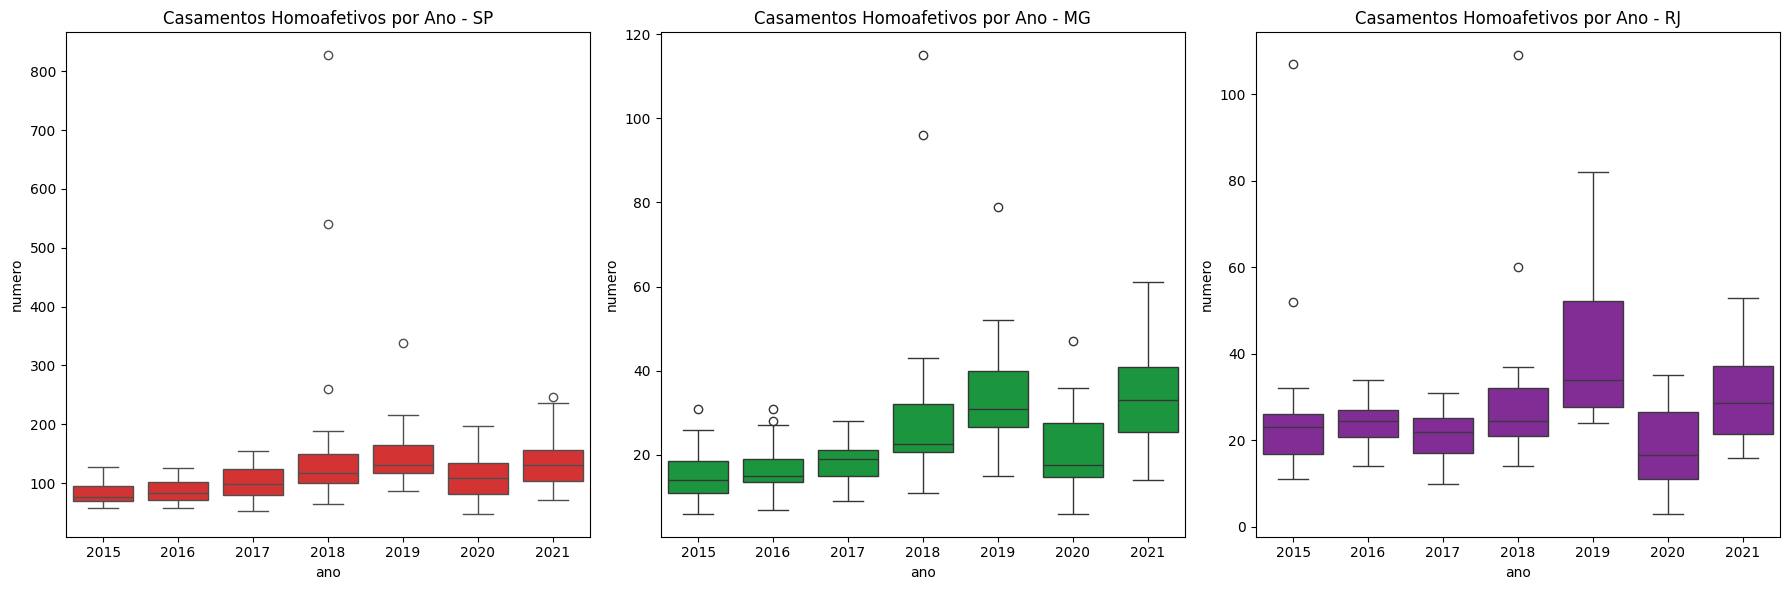

In [1031]:
fig, axs = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(data=df_sp, x=df_sp['ano'], y='numero', ax=axs[0], color='#ef1818')
axs[0].set_title('Casamentos Homoafetivos por Ano - SP')

sns.boxplot(data=df_mg, x=df_mg['ano'], y='numero', ax=axs[1], color='#07aa35')
axs[1].set_title('Casamentos Homoafetivos por Ano - MG')

sns.boxplot(data=df_rj, x=df_rj['ano'], y='numero', ax=axs[2], color='#8c1ca6')
axs[2].set_title('Casamentos Homoafetivos por Ano - RJ')

plt.tight_layout()
plt.savefig("./img/grafico-boxplot-outliers.png", transparent='True')
plt.show()

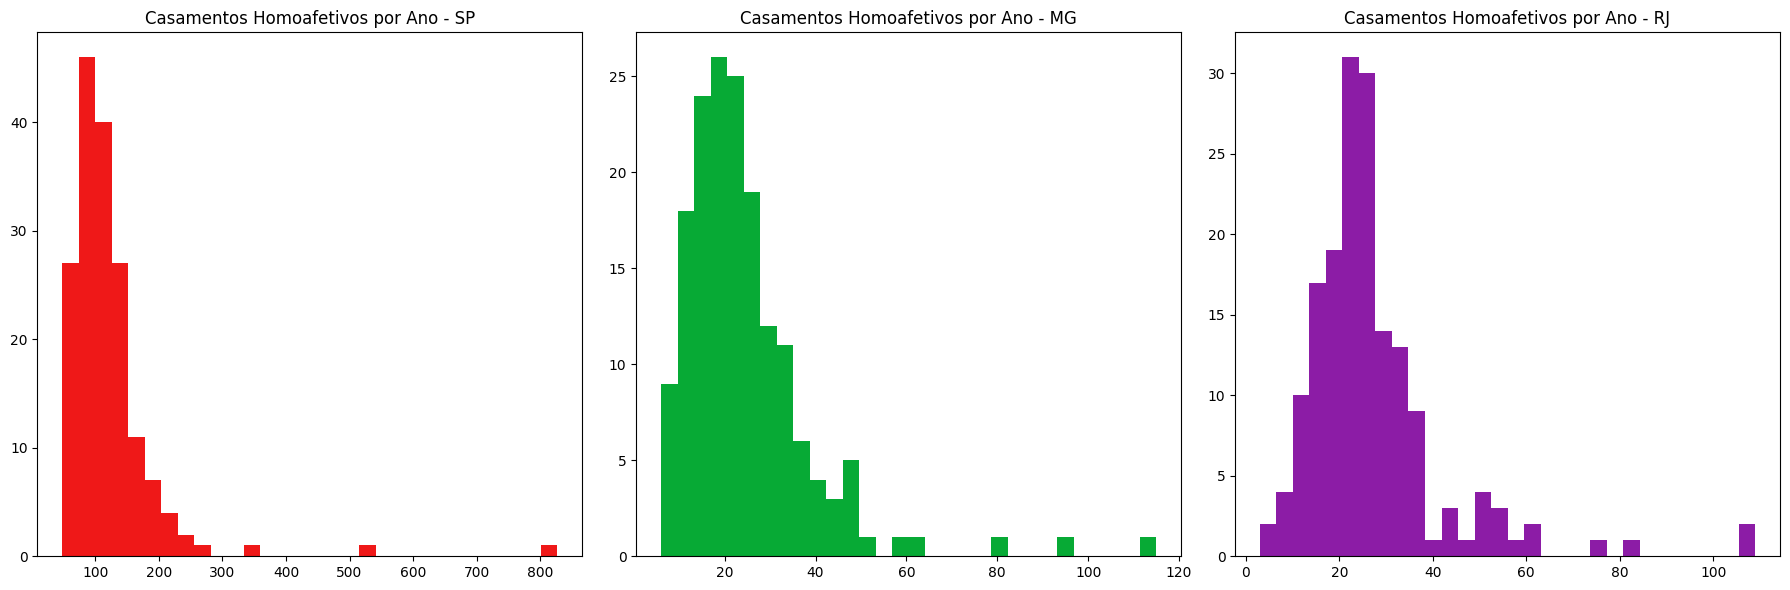

In [1030]:
fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].hist(df_sp['numero'], bins=30, color='#ef1818')
axs[0].set_title('Casamentos Homoafetivos por Ano - SP')

axs[1].hist(df_mg['numero'], bins=30, color='#07aa35')
axs[1].set_title('Casamentos Homoafetivos por Ano - MG')

axs[2].hist(df_rj['numero'], bins=30, color='#8c1ca6')
axs[2].set_title('Casamentos Homoafetivos por Ano - RJ')

plt.tight_layout()
plt.savefig("./img/grafico-histogram.png", transparent='True')
plt.show()

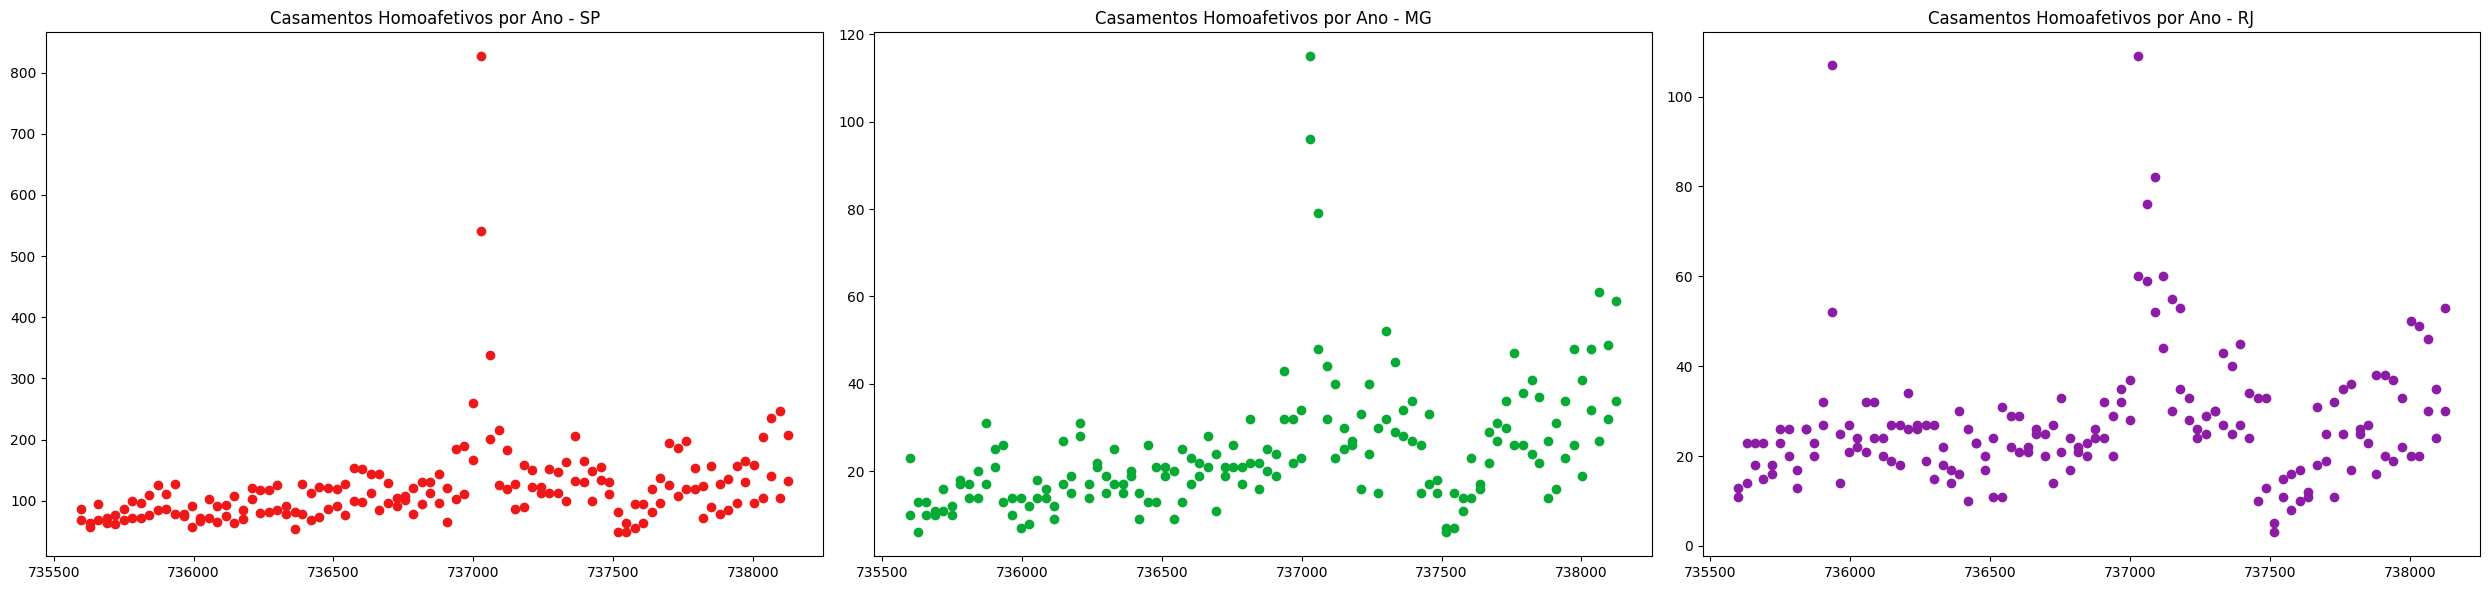

In [1029]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))

axs[0].scatter(data=df_sp, y='numero', x='data_ordinal', color='#ef1818')
axs[0].set_title('Casamentos Homoafetivos por Ano - SP')

axs[1].scatter(data=df_mg, y='numero', x='data_ordinal', color='#07aa35')
axs[1].set_title('Casamentos Homoafetivos por Ano - MG')

axs[2].scatter(data=df_rj, y='numero', x='data_ordinal', color='#8c1ca6')
axs[2].set_title('Casamentos Homoafetivos por Ano - RJ')


plt.tight_layout()
plt.savefig("./img/grafico-scatter-outliers.png", transparent='True')
plt.show()

Para remover os outliers será utilizado o método de Tukey

In [1032]:
def removeoutlier(values, data):
    fator = 1.5
    Q3, Q1 = np.percentile(values, [75, 25])
    IQR = Q3-Q1
    lowpass = Q1-(IQR * fator)
    highpass = Q3 + (IQR * fator)

    outlier = [v for v in values if v < lowpass or v > highpass] 
    data = data[~((data['numero'] < lowpass) | (data['numero'] > highpass))]
    return outlier, data

(outlier_sp, df_sp) = removeoutlier(df_sp['numero'], df_sp)
(outlier_mg, df_mg) = removeoutlier(df_mg['numero'], df_mg)
(outlier_rj, df_rj) = removeoutlier(df_rj['numero'], df_rj)

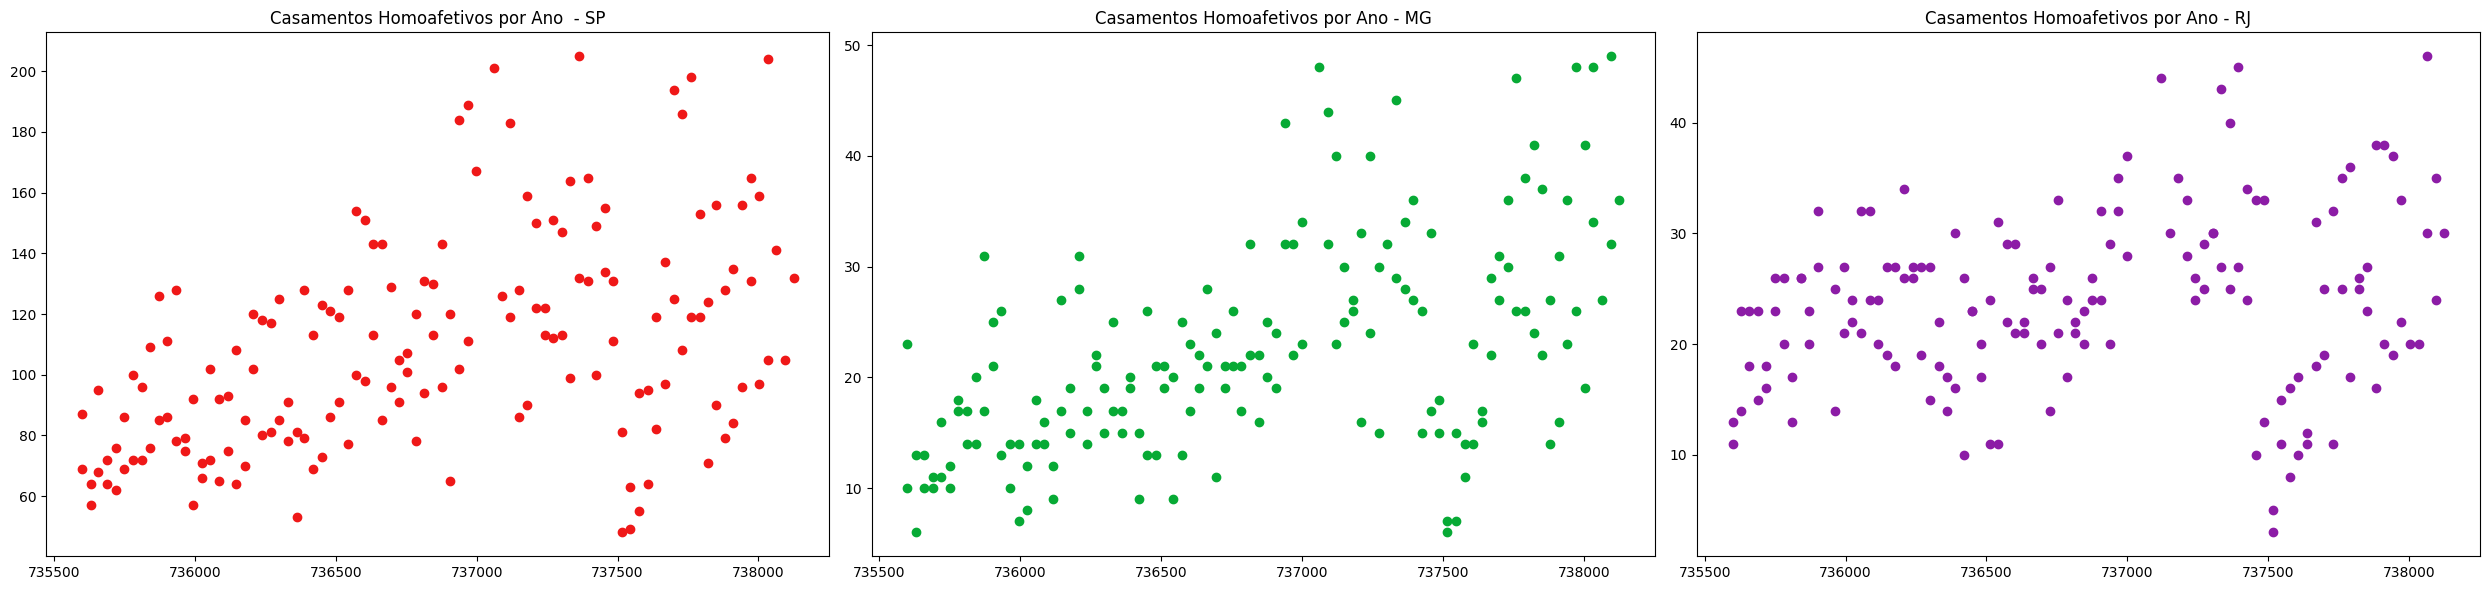

In [1035]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))

axs[0].scatter(data=df_sp, y='numero', x='data_ordinal', color='#ef1818')
axs[0].set_title('Casamentos Homoafetivos por Ano  - SP')

axs[1].scatter(data=df_mg, y='numero', x='data_ordinal', color='#07aa35')
axs[1].set_title('Casamentos Homoafetivos por Ano - MG')

axs[2].scatter(data=df_rj, y='numero', x='data_ordinal', color='#8c1ca6')
axs[2].set_title('Casamentos Homoafetivos por Ano - RJ')


plt.tight_layout()
plt.savefig("./img/grafico-scatter-no-outlier.png", transparent='True')
plt.show()

In [1036]:
df_sp.to_csv('data_sp.csv', index=False)
df_mg.to_csv('data_mg.csv', index=False)
df_rj.to_csv('data_rj.csv', index=False)

## 4.2 Construindo o Modelo de ML

Para realizar a previsão, será utilizado o modelo **RandomForest Regressor** da biblioteca *scikit-learn* 

In [1037]:
df_sp = pd.read_csv('data_sp.csv')
df_mg = pd.read_csv('data_mg.csv')
df_rj = pd.read_csv('data_rj.csv')

### 4.2.1 Previsão SP

#### 4.2.1.2 RandomForest Regressor

##### Treinando modelo

In [1038]:
X_sp = df_sp[['data_ordinal', 'genero', 'uf_id']]
y_sp = df_sp.numero

X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_sp, y_sp,
                                                                test_size=0.2,
                                                                random_state=42)

scaler = StandardScaler()
X_train_sp = scaler.fit_transform(X_train_sp)
X_test_sp = scaler.transform(X_test_sp)

In [911]:
param_grid = {
    'max_depth': [50, 100, 500],
    'max_features': [5, 10],
    'min_samples_leaf': [2, 4, 5],
    'min_samples_split': [8, 2, 4],
    'n_estimators': [5, 10, 20],
    'criterion': ['poisson'],
    'bootstrap': [True]
}


model_rf = RandomForestRegressor()

grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_train_sp, y_train_sp)
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=p

d:\Data Science\Monks - Teste\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


##### Resultado do Modelo Treinado

In [1040]:
model_rf_sp = RandomForestRegressor( bootstrap=True,
                                    criterion= 'poisson',
                                    max_depth=grid.best_params_['max_depth'],
                                    max_features=grid.best_params_['max_features'],
                                    min_samples_leaf= grid.best_params_['min_samples_leaf'],
                                    min_samples_split= grid.best_params_['min_samples_split'],
                                    n_estimators=grid.best_params_['n_estimators'])

model_rf_sp.fit(X_test_sp,y_test_sp)

y_pred_sp = model_rf_sp.predict(X_test_sp)

MAE_sp = mean_absolute_error(y_test_sp,y_pred_sp)
print(f'Erro Médio Absoluto (MAE): {MAE_sp}')

Erro Médio Absoluto (MAE): 13.917239583333334


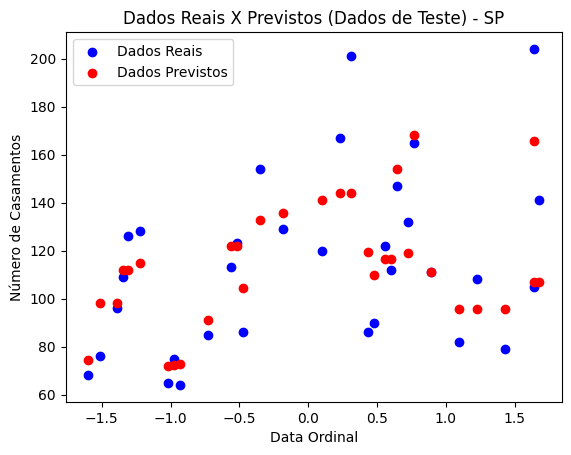

In [1043]:
plt.scatter(X_test_sp[:,0], y_test_sp, color='blue', label='Dados Reais')
plt.scatter(X_test_sp[:,0], y_pred_sp, color='red', label='Dados Previstos')
plt.title('Dados Reais X Previstos (Dados de Teste) - SP')
plt.xlabel('Data Ordinal')
plt.ylabel('Número de Casamentos')
plt.legend()
plt.savefig("./img/test-model-sp.png", transparent='True')
plt.show()

##### Criando datafreme de dados futuros

In [ ]:
anos = [2022, 2023]
meses = list(range(1,13))
gens = [0, 1]
uf_id_sp = [35]

df_future_sp = pd.DataFrame([(ano, mes, gen, uf) for ano in anos
                                          for mes in meses
                                          for gen in gens
                                          for uf in uf_id_sp], columns=['ano', 'mes', 'genero', 'uf_id'])

df_future_sp['data'] = df_future_sp['ano'].astype(str) + '/' + df_future_sp['mes'].astype(str)
df_future_sp['data'] = pd.to_datetime(df_future_sp['data'], format='%Y/%m')
df_future_sp['data_ordinal'] = df_future_sp['data'].apply(lambda x: x.toordinal())

df_future_sp

##### Aplicando os dados Futuros no modelo desenvolvido

In [918]:
num_pred_sp = model_rf_sp.predict((df_future_sp[['data_ordinal','genero', 'uf_id']]).sample(frac=1).reset_index(drop=True))

df_future_sp.loc[:,'num_prev'] = num_pred_sp

d:\Data Science\Monks - Teste\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [919]:
df_future_sp

,ano,mes,genero,uf_id,data,data_ordinal,num_prev
0,2022,1,0,35,2022-01-01,738156,127.873333
1,2022,1,1,35,2022-01-01,738156,127.873333
2,2022,2,0,35,2022-02-01,738187,127.873333
3,2022,2,1,35,2022-02-01,738187,127.873333
4,2022,3,0,35,2022-03-01,738215,146.433333
5,2022,3,1,35,2022-03-01,738215,127.873333
6,2022,4,0,35,2022-04-01,738246,146.433333
7,2022,4,1,35,2022-04-01,738246,146.433333
8,2022,5,0,35,2022-05-01,738276,127.873333
9,2022,5,1,35,2022-05-01,738276,127.873333


##### Previsão de Casamentos em 2022 e 2023

In [920]:
df_future_sp.groupby(['ano'])['num_prev'].sum().reset_index()

,ano,num_prev
0,2022,3273.12
1,2023,3310.24


In [793]:
df_future_sp.to_csv('df_future_sp.csv')

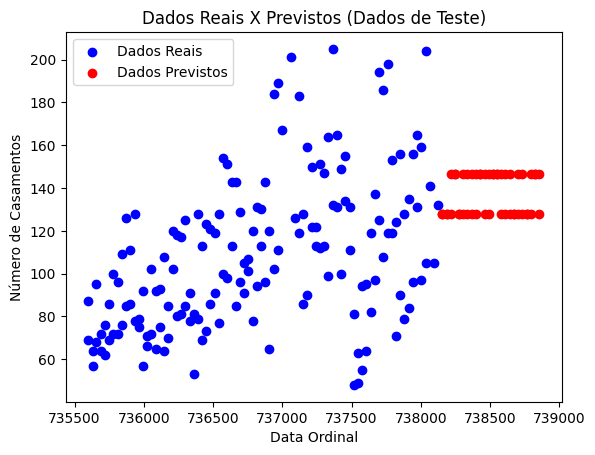

In [923]:
plt.scatter([df_sp['data_ordinal']], df_sp['numero'], color='blue', label='Dados Reais')
plt.scatter(df_future_sp['data_ordinal'], df_future_sp['num_prev'], color='red', label='Dados Previstos')
plt.title('Dados Reais X Previstos (Dados de Teste)')
plt.xlabel('Data Ordinal')
plt.ylabel('Número de Casamentos')
plt.legend()
plt.show()

### 4.2.2 Previsão MG

#### 4.2.2.2 RandomForest Regressor

##### Treinando Modelo

In [924]:
X_mg = df_mg[['data_ordinal', 'genero', 'uf_id']]
y_mg = df_mg.numero

X_train_mg, X_test_mg, y_train_mg, y_test_mg = train_test_split(X_mg, y_mg,
                                                                test_size=0.2,
                                                                random_state=42)

scaler = StandardScaler()
X_train_mg = scaler.fit_transform(X_train_mg)
X_test_mg = scaler.transform(X_test_mg)

In [925]:
param_grid = {
    'max_depth': [50, 100, 500],
    'max_features': [5, 10],
    'min_samples_leaf': [2, 4, 5],
    'min_samples_split': [8, 2, 4],
    'n_estimators': [5, 10, 20],
    'criterion': ['poisson'],
    'bootstrap': [True]
}


model_rf = RandomForestRegressor()

grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_train_mg, y_train_mg)
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=p

d:\Data Science\Monks - Teste\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


##### Resultado do Modelo Treinado

In [1044]:
model_rf_mg = RandomForestRegressor( bootstrap=True,
                                    criterion= 'poisson',
                                    max_depth=grid.best_params_['max_depth'],
                                    max_features=grid.best_params_['max_features'],
                                    min_samples_leaf= grid.best_params_['min_samples_leaf'],
                                    min_samples_split= grid.best_params_['min_samples_split'],
                                    n_estimators=grid.best_params_['n_estimators'])

model_rf_mg.fit(X_test_mg,y_test_mg)

y_pred_mg = model_rf_mg.predict(X_test_mg)

MAE_mg = mean_absolute_error(y_test_mg,y_pred_mg)
print(f'Erro Médio Absoluto (MAE): {MAE_mg}')

Erro Médio Absoluto (MAE): 4.005858585858585


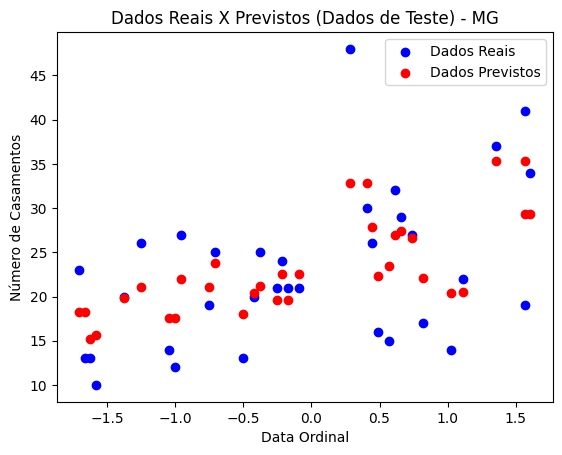

In [1045]:
plt.scatter(X_test_mg[:,0], y_test_mg, color='blue', label='Dados Reais')
plt.scatter(X_test_mg[:,0], y_pred_mg, color='red', label='Dados Previstos')
plt.title('Dados Reais X Previstos (Dados de Teste) - MG')
plt.xlabel('Data Ordinal')
plt.ylabel('Número de Casamentos')
plt.legend()
plt.savefig("./img/test-model-mg.png", transparent='True')
plt.show()

##### Criando DataFrame de Dados Futuros

In [930]:
anos = [2022, 2023]
meses = list(range(1,13))
gens = [0, 1]
uf_id_mg = [31]

df_future_mg = pd.DataFrame([(ano, mes, gen, uf) for ano in anos
                                          for mes in meses
                                          for gen in gens
                                          for uf in uf_id_mg], columns=['ano', 'mes', 'genero', 'uf_id'])

df_future_mg['data'] = df_future_mg['ano'].astype(str) + '/' + df_future_mg['mes'].astype(str)
df_future_mg['data'] = pd.to_datetime(df_future_mg['data'], format='%Y/%m')
df_future_mg['data_ordinal'] = df_future_mg['data'].apply(lambda x: x.toordinal())

df_future_mg.head()

,ano,mes,genero,uf_id,data,data_ordinal
0,2022,1,0,31,2022-01-01,738156
1,2022,1,1,31,2022-01-01,738156
2,2022,2,0,31,2022-02-01,738187
3,2022,2,1,31,2022-02-01,738187
4,2022,3,0,31,2022-03-01,738215
5,2022,3,1,31,2022-03-01,738215
6,2022,4,0,31,2022-04-01,738246
7,2022,4,1,31,2022-04-01,738246
8,2022,5,0,31,2022-05-01,738276
9,2022,5,1,31,2022-05-01,738276


##### Aplicando os Dados Futuros no Modelo Desensolvido

In [931]:
num_pred_mg = model_rf_mg.predict((df_future_mg[['data_ordinal','genero', 'uf_id']]).sample(frac=1).reset_index(drop=True))

df_future_mg.loc[:,'num_prev'] = num_pred_mg

df_future_mg

d:\Data Science\Monks - Teste\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


##### Previsão de Casamentos em 2022 e 2023

In [953]:
df_future_mg.groupby(['ano'])['num_prev'].sum().reset_index()

,ano,num_prev
0,2022,781.522857
1,2023,781.522857


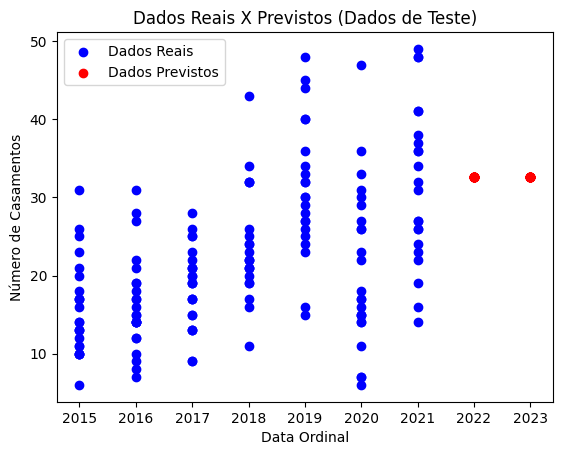

In [936]:
plt.scatter([df_mg['ano']], df_mg['numero'], color='blue', label='Dados Reais')
plt.scatter(df_future_mg['ano'], df_future_mg['num_prev'], color='red', label='Dados Previstos')
plt.title('Dados Reais X Previstos (Dados de Teste)')
plt.xlabel('Data Ordinal')
plt.ylabel('Número de Casamentos')
plt.legend()
plt.show()

### 4.2.3 Previsão RJ

#### 4.2.3.1 RandomForest Regressor

##### Treinando Modelo

In [937]:
X_rj = df_rj[['data_ordinal', 'genero', 'uf_id']]
y_rj = df_rj.numero

X_train_rj, X_test_rj, y_train_rj, y_test_rj = train_test_split(X_rj, y_rj,
                                                                test_size=0.2,
                                                                random_state=42)

scaler = StandardScaler()
X_train_rj = scaler.fit_transform(X_train_rj)
X_test_rj = scaler.transform(X_test_rj)

In [938]:
param_grid = {
    'max_depth': [50, 100, 500],
    'max_features': [5, 10],
    'min_samples_leaf': [2, 4, 5],
    'min_samples_split': [8, 2, 4],
    'n_estimators': [5, 10, 20],
    'criterion': ['poisson'],
    'bootstrap': [True]
}


model_rf = RandomForestRegressor()

grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_train_rj, y_train_rj)
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=poisson, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=p

d:\Data Science\Monks - Teste\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


##### Resultado do Modelo Treinado

In [1046]:
model_rf_rj = RandomForestRegressor( bootstrap=True,
                                    criterion= 'poisson',
                                    max_depth=grid.best_params_['max_depth'],
                                    max_features=grid.best_params_['max_features'],
                                    min_samples_leaf= grid.best_params_['min_samples_leaf'],
                                    min_samples_split= grid.best_params_['min_samples_split'],
                                    n_estimators=grid.best_params_['n_estimators'])

model_rf_rj.fit(X_test_rj,y_test_rj)

y_pred_rj = model_rf_rj.predict(X_test_rj)

MAE_rj = mean_absolute_error(y_test_rj,y_pred_rj)
print(f'Erro Médio Absoluto (MAE): {MAE_rj}')

Erro Médio Absoluto (MAE): 3.288164362519202


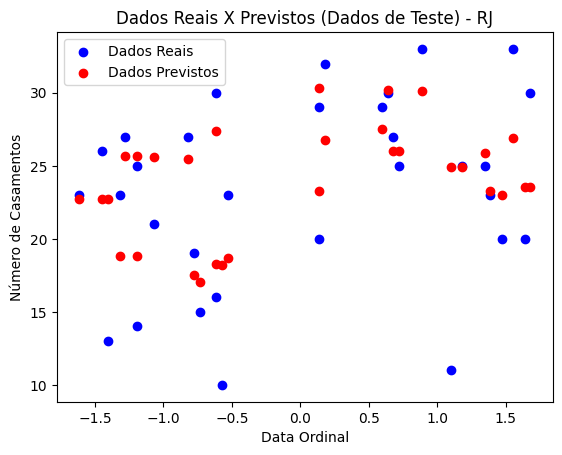

In [1047]:
plt.scatter(X_test_rj[:,0], y_test_rj, color='blue', label='Dados Reais')
plt.scatter(X_test_rj[:,0], y_pred_rj, color='red', label='Dados Previstos')
plt.title('Dados Reais X Previstos (Dados de Teste) - RJ')
plt.xlabel('Data Ordinal')
plt.ylabel('Número de Casamentos')
plt.legend()
plt.savefig("./img/test-model-rj.png", transparent='True')
plt.show()

##### Criando DataFrame de Dados Futuros

In [943]:
anos = [2022, 2023]
meses = list(range(1,13))
gens = [0, 1]
uf_id_rj = [33]

df_future_rj = pd.DataFrame([(ano, mes, gen, uf) for ano in anos
                                          for mes in meses
                                          for gen in gens
                                          for uf in uf_id_rj], columns=['ano', 'mes', 'genero', 'uf_id'])

df_future_rj['data'] = df_future_rj['ano'].astype(str) + '/' + df_future_rj['mes'].astype(str)
df_future_rj['data'] = pd.to_datetime(df_future_rj['data'], format='%Y/%m')
df_future_rj['data_ordinal'] = df_future_rj['data'].apply(lambda x: x.toordinal())

df_future_rj.head()

,ano,mes,genero,uf_id,data,data_ordinal
0,2022,1,0,33,2022-01-01,738156
1,2022,1,1,33,2022-01-01,738156
2,2022,2,0,33,2022-02-01,738187
3,2022,2,1,33,2022-02-01,738187
4,2022,3,0,33,2022-03-01,738215
5,2022,3,1,33,2022-03-01,738215
6,2022,4,0,33,2022-04-01,738246
7,2022,4,1,33,2022-04-01,738246
8,2022,5,0,33,2022-05-01,738276
9,2022,5,1,33,2022-05-01,738276


##### Aplicando os Dados Futuros no Modelo Desenvolvido

In [944]:
num_pred_rj = model_rf_rj.predict((df_future_rj[['data_ordinal','genero', 'uf_id']]).sample(frac=1).reset_index(drop=True))

df_future_rj.loc[:,'num_prev'] = num_pred_rj

df_future_rj

d:\Data Science\Monks - Teste\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,ano,mes,genero,uf_id,data,data_ordinal,num_prev
0,2022,1,0,33,2022-01-01,738156,24.730000
1,2022,1,1,33,2022-01-01,738156,26.981667
2,2022,2,0,33,2022-02-01,738187,26.981667
3,2022,2,1,33,2022-02-01,738187,26.981667
4,2022,3,0,33,2022-03-01,738215,26.981667
5,2022,3,1,33,2022-03-01,738215,24.730000
6,2022,4,0,33,2022-04-01,738246,26.981667
7,2022,4,1,33,2022-04-01,738246,24.730000
8,2022,5,0,33,2022-05-01,738276,24.730000
9,2022,5,1,33,2022-05-01,738276,26.981667


##### Previsão de Casamentos em 2022 e 2023

In [946]:
df_future_rj.groupby(['ano'])['num_prev'].sum().reset_index()

,ano,num_prev
0,2022,618.288333
1,2023,622.791667


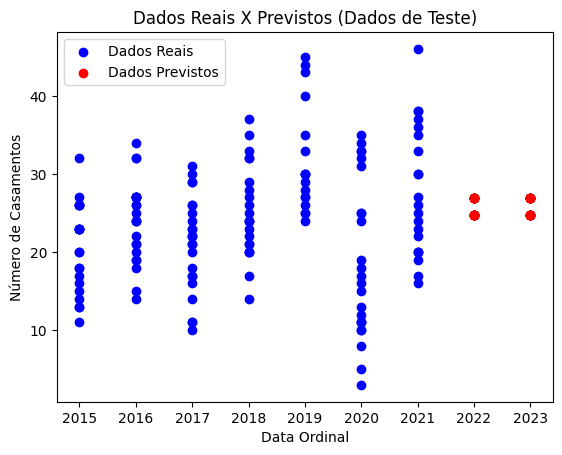

In [947]:
plt.scatter([df_rj['ano']], df_rj['numero'], color='blue', label='Dados Reais')
plt.scatter(df_future_rj['ano'], df_future_rj['num_prev'], color='red', label='Dados Previstos')
plt.title('Dados Reais X Previstos (Dados de Teste)')
plt.xlabel('Data Ordinal')
plt.ylabel('Número de Casamentos')
plt.legend()
plt.show()